In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout
from keras.layers.core import Activation

import tensorflow as tf

from keras.preprocessing.image import ImageDataGenerator
from keras.optimizer_v2.adam import Adam

from sklearn.metrics import classification_report,confusion_matrix

import pandas as pd


import cv2
import os

import numpy as np

In [2]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')
root = 'drive/My Drive/Colab Notebooks/'
reda_root = 'drive/My Drive/TFG/'
paht = 'drive/My Drive/Colab Notebooks/fakkedit/'

Mounted at /content/drive


In [3]:
!tar -xvf '/content/drive/MyDrive/TFG/public_images.tar.bz2' -C /content/

Se han truncado las últimas 5000 líneas del flujo de salida.
public_image_set/8cvoz5.jpg
public_image_set/c6pg71q.jpg
public_image_set/51tmrx.jpg
public_image_set/d3mb8n.jpg
public_image_set/coo2bm2.jpg
public_image_set/9gwzta.jpg
public_image_set/bxrpqx.jpg
public_image_set/c6foru7.jpg
public_image_set/c89di3e.jpg
public_image_set/dlc65by.jpg
public_image_set/6e3mok.jpg
public_image_set/cl924i.jpg
public_image_set/6gu8bt.jpg
public_image_set/c7w4pxk.jpg
public_image_set/31kan1.jpg
public_image_set/d8j79ku.jpg
public_image_set/5449c9.jpg
public_image_set/dtf3yhs.jpg
public_image_set/de2791.jpg
public_image_set/d1e8n3.jpg
public_image_set/cbgey1l.jpg
public_image_set/b94xya.jpg
public_image_set/czi21ra.jpg
public_image_set/beedjt.jpg
public_image_set/d51cpe.jpg
public_image_set/awceqv.jpg
public_image_set/bjqqfs.jpg
public_image_set/b3pqlj.jpg
public_image_set/daqojht.jpg
public_image_set/cicbma.jpg
public_image_set/14c1pz.jpg
public_image_set/6rg0fq.jpg
public_image_set/dnkgzia.jpg
pub

In [4]:
%cd /content/public_image_set

/content/public_image_set


In [5]:
!ls -l | awk '{print $9}' | awk -F  "." '{print $1}' | sed '1d' | sed '1i id' >> ../images.csv

In [6]:
MULTIMODAL_ONLY = True # if False, we will load all the
nameFile = 'multimodal_'
if not MULTIMODAL_ONLY:
    nameFile ='all_'
TYPE_CLASSIFICATION = 6 # 2, 3 OR 6

In [7]:
%cd /content

/content


In [8]:
import pandas as pd
train = pd.read_csv(reda_root+"data/fakeddit/" + nameFile+ "train.tsv", sep='\t')
val  = pd.read_csv(reda_root+"data/fakeddit/" + nameFile+ "validate.tsv", sep='\t')
test  = pd.read_csv(reda_root+"data/fakeddit/" + nameFile+ "test_public.tsv", sep='\t')
images = pd.read_csv('images.csv')

print("Dataset: ", nameFile)
print('size training: ', len(train))
print('size validation: ', len(val))
print('size test: ', len(test))
print('size images directory: ', len(images))


Dataset:  multimodal_
size training:  564000
size validation:  59342
size test:  59319
size images directory:  10051


In [9]:
images

,id
0,10e376
1,10f2ie
2,10v0cn
3,112fnc
4,1173ow
...,...
10046,zoqdg
10047,zrk7c
10048,zsjkk
10049,ztvzg


In [10]:
all = pd.concat([train, val, test])
all

,author,clean_title,created_utc,domain,hasImage,id,image_url,linked_submission_id,num_comments,score,subreddit,title,upvote_ratio,2_way_label,3_way_label,6_way_label
0,Alexithymia,my walgreens offbrand mucinex was engraved wit...,1.551641e+09,i.imgur.com,True,awxhir,https://external-preview.redd.it/WylDbZrnbvZdB...,NaN,2.0,12,mildlyinteresting,My Walgreens offbrand Mucinex was engraved wit...,0.84,1,0,0
1,VIDCAs17,this concerned sink with a tiny hat,1.534727e+09,i.redd.it,True,98pbid,https://preview.redd.it/wsfx0gp0f5h11.jpg?widt...,NaN,2.0,119,pareidolia,This concerned sink with a tiny hat,0.99,0,2,2
2,prometheus1123,hackers leak emails from uae ambassador to us,1.496511e+09,aljazeera.com,True,6f2cy5,https://external-preview.redd.it/6fNhdbc6K1vFA...,NaN,1.0,44,neutralnews,Hackers leak emails from UAE ambassador to US,0.92,1,0,0
3,NaN,puppy taking in the view,1.471341e+09,i.imgur.com,True,4xypkv,https://external-preview.redd.it/HLtVNhTR6wtYt...,NaN,26.0,250,photoshopbattles,PsBattle: Puppy taking in the view,0.95,1,0,0
4,3rikR3ith,i found a face in my sheet music too,1.525318e+09,i.redd.it,True,8gnet9,https://preview.redd.it/ri7ut2wn8kv01.jpg?widt...,NaN,2.0,13,pareidolia,I found a face in my sheet music too!,0.84,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59314,lazarus30d,bicycle taxi drivers of new delhi,1.352463e+09,flickr.com,True,12wreq,https://external-preview.redd.it/mWhXZymnupI3a...,NaN,0.0,4,pic,Bicycle taxi drivers of New Delhi,0.64,1,0,0
59315,Sewblon,trump blows up gops formula for winning house ...,1.533888e+09,politico.com,True,9650zw,https://external-preview.redd.it/1uLpjM1bd_vA-...,NaN,1.0,2,neutralnews,Trump blows up GOP's formula for winning House...,0.58,1,0,0
59316,Lifewillbelife,napoleon returns from his exile on the island ...,1.521720e+09,i.redd.it,True,86ax7x,https://preview.redd.it/fuzkuzxt0bn01.png?widt...,NaN,0.0,45,fakehistoryporn,Napoleon returns from his exile on the island ...,0.98,0,2,2
59317,LordCamembert,deep down he always wanted to be a ballet dancer,1.366567e+09,NaN,True,c9jq15h,http://i.imgur.com/otCWbOt.jpg,1cssa3,NaN,141,psbattle_artwork,Deep down he always wanted to be a ballet dancer,NaN,0,2,4


In [11]:
df_with_photo = all.merge(images, on='id')
df_with_photo

,author,clean_title,created_utc,domain,hasImage,id,image_url,linked_submission_id,num_comments,score,subreddit,title,upvote_ratio,2_way_label,3_way_label,6_way_label
0,Fett202,i rarely use my stapler so i guess its accurat...,1.389420e+09,i.imgur.com,True,1uxznb,https://external-preview.redd.it/9mkGU20LmtMMn...,NaN,3.0,16,pareidolia,"I Rarely use my Stapler, So I guess its accura...",0.79,0,2,2
1,all-top-today_SS,how to have sex with a flowercovered roof used...,1.535490e+09,i.imgur.com,True,9b2qiv,https://external-preview.redd.it/Ta-WhwsaISbgm...,NaN,45.0,3678,subredditsimulator,"How to have sex with a flower-covered roof, us...",0.98,0,2,3
2,otgw7,happy plum,1.512920e+09,i.redd.it,True,7iugi8,https://preview.redd.it/6ymktbvv44301.jpg?widt...,NaN,0.0,3,pareidolia,Happy plum,0.72,0,2,2
3,aka_julie,a dog with its head in a gate,1.556511e+09,i.imgur.com,True,bikfgf,https://external-preview.redd.it/SqgAwXaobqtUt...,NaN,7.0,78,photoshopbattles,PsBattle: A dog with its head in a gate,0.95,1,0,0
4,Helkas,a drowned scorpion centipede and lizard pulled...,1.536352e+09,i.redd.it,True,9dy7hj,https://preview.redd.it/9tjv5my2mvk11.jpg?widt...,NaN,21.0,26,mildlyinteresting,"A drowned scorpion, centipede, and lizard pull...",0.81,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8886,youngstersamuel,magnets in the frame and headphones easy access,1.552339e+09,i.redd.it,True,azyuca,https://preview.redd.it/m9q501ha2kl21.jpg?widt...,NaN,6.0,8,mildlyinteresting,"Magnets in the frame and headphones, easy access.",0.78,1,0,0
8887,TheMzhaz,my dad right in vietnam in didnt know this pho...,1.520091e+09,i.redd.it,True,81qs1d,https://preview.redd.it/0ngmxerhhkj01.jpg?widt...,NaN,3.0,2,fakehistoryporn,My dad (right) in Vietnam in 1971. Didn’t know...,0.57,0,2,2
8888,dannylenwinn,spacex test fires twiceflown falcon for worlds...,1.550630e+09,teslarati.com,True,asiqps,https://external-preview.redd.it/DFJKRXgsycgWe...,NaN,0.0,21,usanews,SpaceX test fires twice-flown Falcon 9 for wor...,0.86,1,0,0
8889,secretrebel,stacked stone koala house,1.534845e+09,i.redd.it,True,991t9a,https://preview.redd.it/4k7h8ne14fh11.jpg?widt...,NaN,0.0,4,pareidolia,Stacked stone koala house,0.75,0,2,2


In [12]:
traindata_all, validata_all, testdata_all = np.split(df_with_photo.sample(frac=1, random_state=12345), [int(.6*len(df_with_photo)), int(.8*len(df_with_photo))])
print('size training: ', len(traindata_all))
print('size validation: ', len(validata_all))
print('size test: ', len(testdata_all))

size training:  5334
size validation:  1778
size test:  1779


In [33]:
reduction = 2 #100, 10 or 1

print("reduction applied: ", reduction)


print(f"Training patterns before reduction: {len(traindata_all)}")
traindata_all = traindata_all.sample(int(len(traindata_all)/reduction), random_state=12345)
print(f"Training patterns after reduction:  {len(traindata_all)}")

print(f"Validation patterns before reduction: {len(validata_all)}")
validata_all = validata_all.sample(int(len(validata_all)/reduction), random_state=12345)
print(f"Validation patterns after reduction:  {len(validata_all)}")

print(f"Test patterns before reduction: {len(testdata_all)}")
testdata_all = testdata_all.sample(int(len(testdata_all)/reduction), random_state=12345)
print(f"Test patterns after reduction:  {len(testdata_all)}")

reduction applied:  2
Training patterns before reduction: 533
Training patterns after reduction:  266
Validation patterns before reduction: 177
Validation patterns after reduction:  88
Test patterns before reduction: 177
Test patterns after reduction:  88


In [34]:
%cd /content/

/content


In [35]:
img_size = 224
def get_data(source, path, limit = -1):
    iter = 0
    x = [] 
    y = []
    for index, row in source.iterrows():
        iter+= 1
        if iter == limit:
            break
        try:
            img = row['id'] + '.jpg'
            class_num = row[str(TYPE_CLASSIFICATION) +'_way_label']
            print('[' + str(index) + ']' + ' Trying img = ' + img + ' with class = ' + str(class_num) + ' for type = ' + str(TYPE_CLASSIFICATION))
            img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
            resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
            x.append(resized_arr / 255)
            y.append(class_num)
        except Exception as e:
           print(e)
           print('Error in row ' + str(index) + ' for image named ' + img)
    return np.array(x), np.array(y)

In [36]:
# Now we can easily fetch our train and validation data.
x_train, y_train = get_data(traindata_all, './public_image_set', -1)
x_val, y_val = get_data(validata_all, './public_image_set', -1)

[4472] Trying img = c7pzqoh.jpg with class = 4 for type = 6
[2953] Trying img = c64okf2.jpg with class = 4 for type = 6
[3612] Trying img = cjy9mh8.jpg with class = 4 for type = 6
[7859] Trying img = ddj7mnx.jpg with class = 4 for type = 6
[2505] Trying img = csxrf43.jpg with class = 4 for type = 6
[7586] Trying img = ckfgklg.jpg with class = 4 for type = 6
[343] Trying img = 9850p0.jpg with class = 0 for type = 6
[6707] Trying img = cksypam.jpg with class = 4 for type = 6
[5458] Trying img = d1yq4ej.jpg with class = 4 for type = 6
[3143] Trying img = cu41xc8.jpg with class = 4 for type = 6
[6397] Trying img = cgc1kt.jpg with class = 2 for type = 6
[6767] Trying img = 3p9gys.jpg with class = 0 for type = 6
[5307] Trying img = cf10x2g.jpg with class = 4 for type = 6
[4199] Trying img = bfny2d.jpg with class = 0 for type = 6
[4410] Trying img = 5kbbv7.jpg with class = 0 for type = 6
[5068] Trying img = 37aofv.jpg with class = 0 for type = 6
[6877] Trying img = b6vwku.jpg with class = 0 f

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


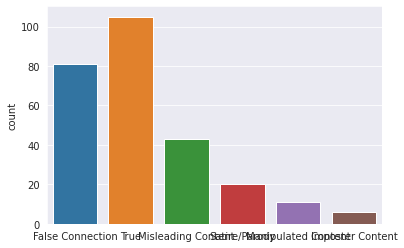

In [37]:
l = []
for i in y_train:
    if(i == 0):
        l.append("True")
    elif(i == 1):
        l.append("Satire/Parody")
    elif(i == 2):
        l.append("Misleading Content")
    elif(i == 3):
        l.append("Imposter Content")
    elif(i == 4):
        l.append("False Connection")
    elif(i == 5):
        l.append("Manipulated Content")
sns.set_style('darkgrid')
sns.countplot(l)

Imposter content has a lower number examples so we need to balance the data 
(pendiente)

In [38]:
#x_train.reshape(-1, img_size, img_size, 1)
#x_val.reshape(-1, img_size, img_size, 1)

In [39]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [60]:
# Creating a Sequential model
model= Sequential()
model.add(Conv2D(kernel_size=(3,3), filters=32, activation='tanh', input_shape=(224,224,3,)))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))

model.add(Flatten())

model.add(Dense(20,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(TYPE_CLASSIFICATION, activation = 'softmax'))

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 conv2d_21 (Conv2D)          (None, 220, 220, 30)      8670      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 110, 110, 30)     0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 108, 108, 30)      8130      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 54, 54, 30)       0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 52, 52, 30)       

In [61]:
model.compile(
              loss='sparse_categorical_crossentropy', 
              metrics=['acc'],
              optimizer='adam'
             )

In [62]:
history = model.fit(x_train,y_train,epochs=50,batch_size=50,validation_data=(x_val,y_val))

Epoch 1/50
6/6 [==============================] - 1s 159ms/step - loss: 3.1156 - acc: 0.2331 - val_loss: 1.5559 - val_acc: 0.3182
Epoch 2/50
6/6 [==============================] - 1s 119ms/step - loss: 1.5709 - acc: 0.3910 - val_loss: 1.7268 - val_acc: 0.2955
Epoch 3/50
6/6 [==============================] - 1s 119ms/step - loss: 1.5406 - acc: 0.3985 - val_loss: 1.6386 - val_acc: 0.3182
Epoch 4/50
6/6 [==============================] - 1s 119ms/step - loss: 1.4991 - acc: 0.4098 - val_loss: 1.5295 - val_acc: 0.3523
Epoch 5/50
6/6 [==============================] - 1s 120ms/step - loss: 1.4207 - acc: 0.4624 - val_loss: 1.7410 - val_acc: 0.3068
Epoch 6/50
6/6 [==============================] - 1s 119ms/step - loss: 1.4519 - acc: 0.4586 - val_loss: 1.5078 - val_acc: 0.3523
Epoch 7/50
6/6 [==============================] - 1s 122ms/step - loss: 1.4008 - acc: 0.4624 - val_loss: 1.5040 - val_acc: 0.3409
Epoch 8/50
6/6 [==============================] - 1s 121ms/step - loss: 1.3513 - acc: 0.45

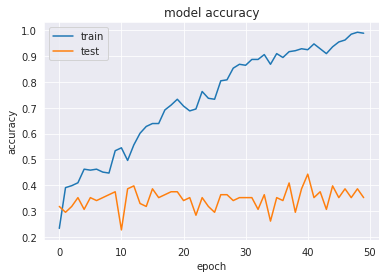

In [63]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()